# Ward

This notebook illustrates the hierarchical clustering of graphs by the [Ward method](https://scikit-network.readthedocs.io/en/latest/reference/hierarchy.html), based on the spectral embedding of the graph.

In [ ]:
from IPython.display import SVG

In [ ]:
%matplotlib inline

In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram as show_dendrogram

In [2]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.embedding import Spectral
from sknetwork.hierarchy import Ward, BiWard, cut_straight, dasgupta_score, tree_sampling_divergence
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

## Undirected graphs

**Loading**

In [3]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position

**Clustering**

In [4]:
ward = Ward()
dendrogram = ward.fit_transform(adjacency)

**Visualization**

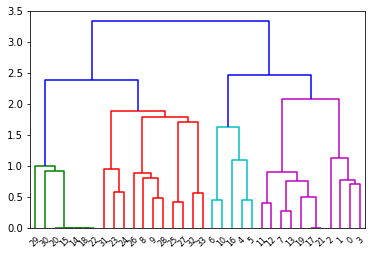

In [6]:
_ = show_dendrogram(dendrogram, no_label=True)

**Cuts of the dendrogram**

In [7]:
labels = cut_straight(dendrogram)
print(labels)

[1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
labels = cut_straight(dendrogram, n_clusters = 4)
print(labels)

[1 1 1 1 3 3 3 1 0 0 3 1 1 1 2 2 3 1 2 1 2 1 2 0 0 0 0 0 0 2 2 0 0 0]


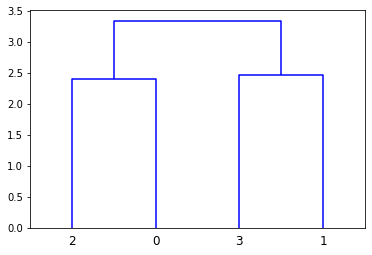

In [9]:
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters = 4, return_dendrogram=True)
_ = show_dendrogram(dendrogram_aggregate)

**Visualization**

In [10]:
image = svg_graph(adjacency, position, labels=labels)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:402: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(alpha, collections.Iterable):
/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


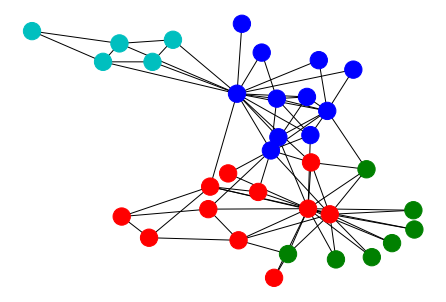

In [11]:
SVG(image)

**Metrics**

In [12]:
dasgupta_score(adjacency, dendrogram)

0.583710407239819

In [13]:
tree_sampling_divergence(adjacency, dendrogram)

0.4342993247923885

**Option**

In [14]:
# select another embedding
ward = Ward(embedding_method=Spectral(4))

Ward(embedding_method=Spectral(n_components=5, normalized_laplacian=True, regularization=0.01, relative_regularization=True, equalize=False, barycenter=True, normalize=True, solver=LanczosEig(which='LA')))

## Directed graphs

**Loading**

In [15]:
graph = painters(metadata=True)
adjacency = graph.adjacency
position = graph.position
names = graph.names

**Clustering**

In [16]:
biward = BiWard()
dendrogram = biward.fit_transform(adjacency)

**Visualization**

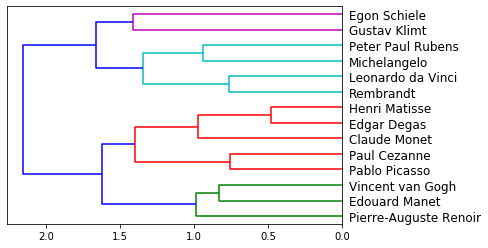

In [18]:
_ = show_dendrogram(dendrogram, labels = names, orientation = 'left')

**Cuts of the dendrogram**

In [19]:
# cut with 3 clusters
labels = cut_straight(dendrogram, n_clusters = 3)
print(labels)

[0 0 1 0 1 1 2 0 0 1 0 0 0 2]


**Visualization**

In [21]:
image = svg_digraph(adjacency, position, names=names, labels=labels)

In [ ]:
SVG(image)

**Metrics**

In [23]:
dasgupta_score(adjacency, dendrogram)

0.49857142857142855

In [24]:
tree_sampling_divergence(adjacency, dendrogram)

0.48729193280825467

## Bipartite graphs

**Loading**

In [25]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
position_row = graph.position_row
position_col = graph.position_col
names_row = graph.names_row
names_col = graph.names_col

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Clustering**

In [26]:
biward = BiWard(cluster_col = True, cluster_both = True)
biward.fit(biadjacency)

BiWard(embedding_method=GSVD(n_components=10, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, singular_right=0.0, normalize=True, solver=LanczosSVD()), cluster_row=True, cluster_col=True, cluster_both=True)

In [27]:
dendrogram_row = biward.dendrogram_row_
dendrogram_col = biward.dendrogram_col_
dendrogram_full = biward.dendrogram_full_

**Visualization**

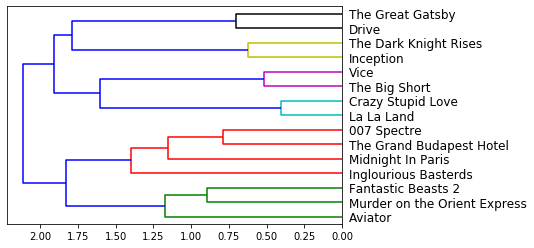

In [28]:
_ = show_dendrogram(dendrogram_row, labels = names_row, orientation = 'left')

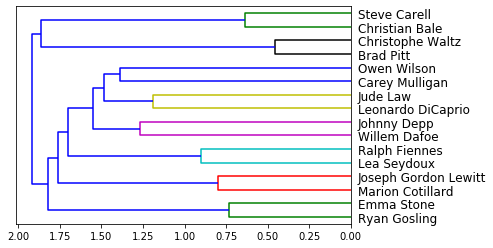

In [29]:
_ = show_dendrogram(dendrogram_col, labels = names_col, orientation = 'left')

**Cuts of the dendrogram**

In [30]:
labels = cut_straight(dendrogram_full, n_clusters = 4)
n_row = biadjacency.shape[0]
labels_row = labels[:n_row]
labels_col = labels[n_row:]

**Visualization**

In [32]:
image = svg_bigraph(biadjacency, position_row, position_col, names_row, names_col, labels_row, labels_col)

In [33]:
SVG(image)